In [1]:
from google.colab import files
uploaded = files.upload()

Saving Chelsea.csv to Chelsea.csv


In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_auc_score

In [51]:
df = pd.read_csv('Chelsea.csv')
df1 = df.drop_duplicates()

In [52]:
print(f"Data Shape: {df1.shape}")
print(f"Data Types: \n{df1.dtypes}")
print(f"Descriptive statistics: {df1.describe()}")
print(f"Data info: \n{df1.info()}")


Data Shape: (699, 30)
Data Types: 
Date                          object
Opponent                      object
Is_Home                        int64
Result                         int64
Goals                          int64
Opponent_Goals                 int64
Possession                     int64
Shots                          int64
Shots_On_Target                int64
Passes_Completed               int64
Pass_Accuracy                  int64
Corners                        int64
Crosses                        int64
Fouls                          int64
Offsides                       int64
Opponent_Possession            int64
Opponent_Shots                 int64
Opponent_Shots_On_Target       int64
Opponent_Passes_Completed      int64
Opponent_Pass_Accuracy         int64
Opponent_Corners               int64
Opponent_Crosses               int64
Opponent_Fouls                 int64
Opponent_Offsides              int64
Shot_Efficiency              float64
Season                         int64
Mon

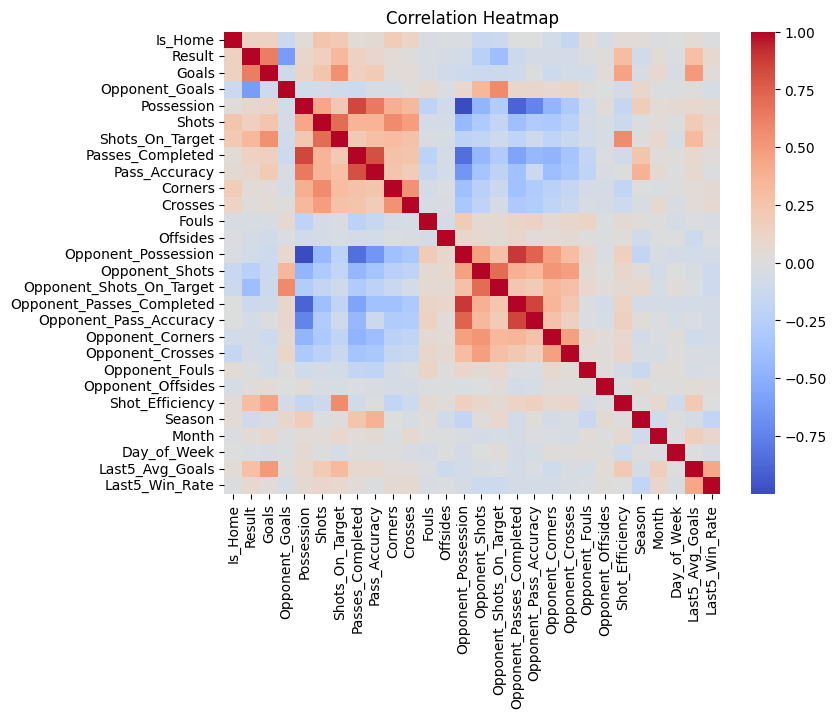

Last5_Win_Rate     1.000000
Last5_Avg_Goals    0.436101
Month              0.098356
Shots              0.097614
Result             0.073403
Shots_On_Target    0.070702
Crosses            0.069689
Possession         0.061153
Corners            0.055291
Goals              0.024766
Name: Last5_Win_Rate, dtype: float64


In [53]:
corr = df1.drop(['Date', 'Opponent'], axis=1).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

print(corr['Last5_Win_Rate'].sort_values(ascending=False)[:10])

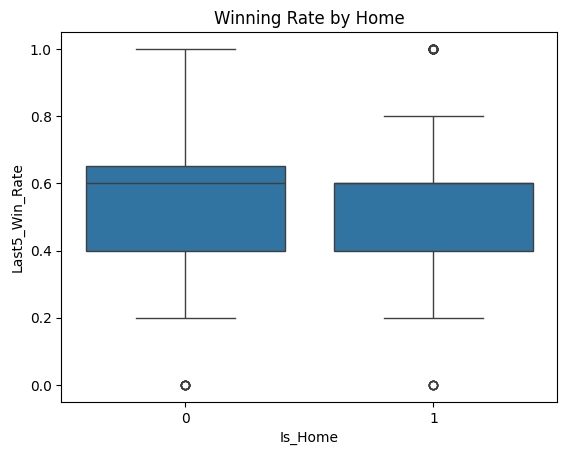

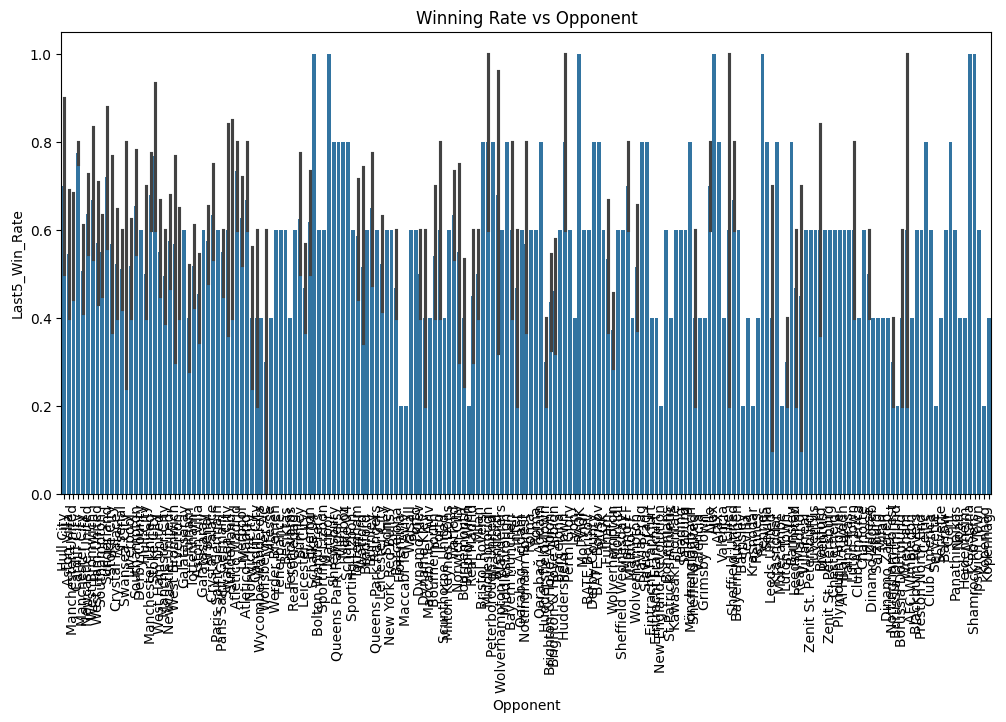

In [54]:
sns.boxplot(x='Is_Home', y='Last5_Win_Rate', data=df1)
plt.title("Winning Rate by Home")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='Opponent', y='Last5_Win_Rate', data=df1)
plt.xticks(rotation=90)
plt.title("Winning Rate vs Opponent")
plt.show()

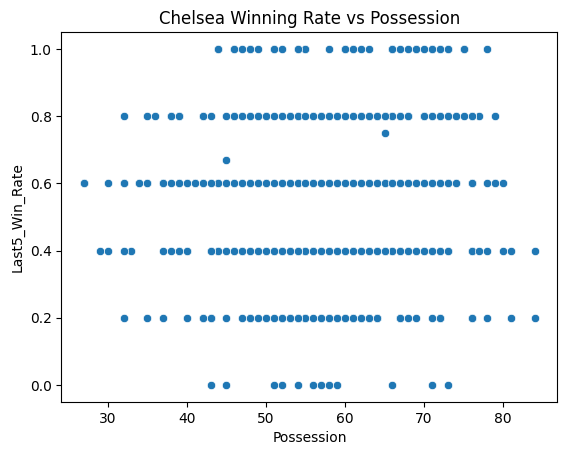

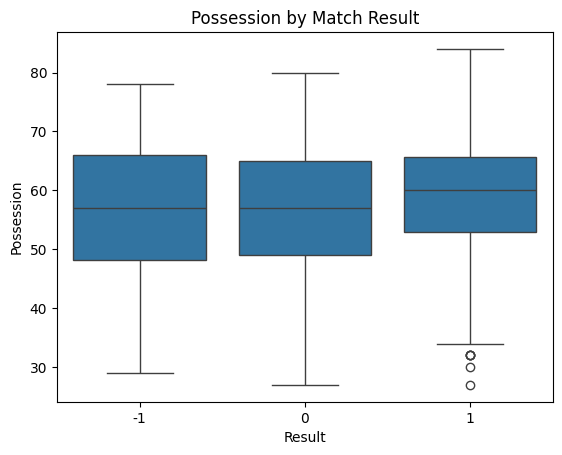

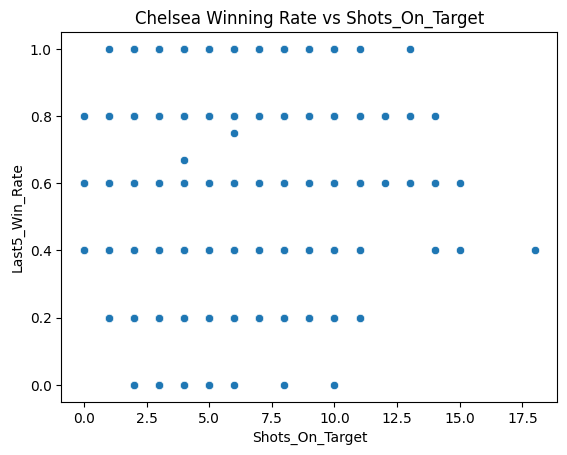

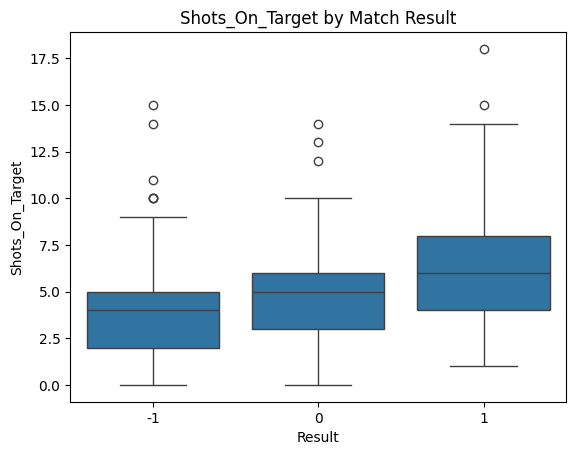

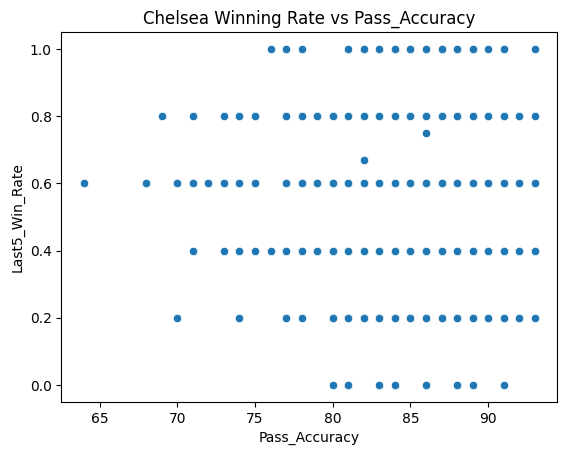

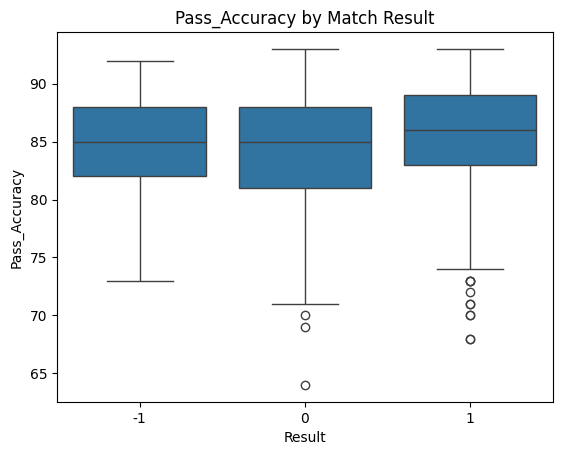

In [22]:
features = ['Possession', 'Shots_On_Target', 'Pass_Accuracy']

for col in features:
    sns.scatterplot(x=col, y='Last5_Win_Rate', data=df1)
    plt.title(f"Chelsea Winning Rate vs {col}")
    plt.show()

    sns.boxplot(x='Result', y=col, data=df1)
    plt.title(f"{col} by Match Result")
    plt.show()

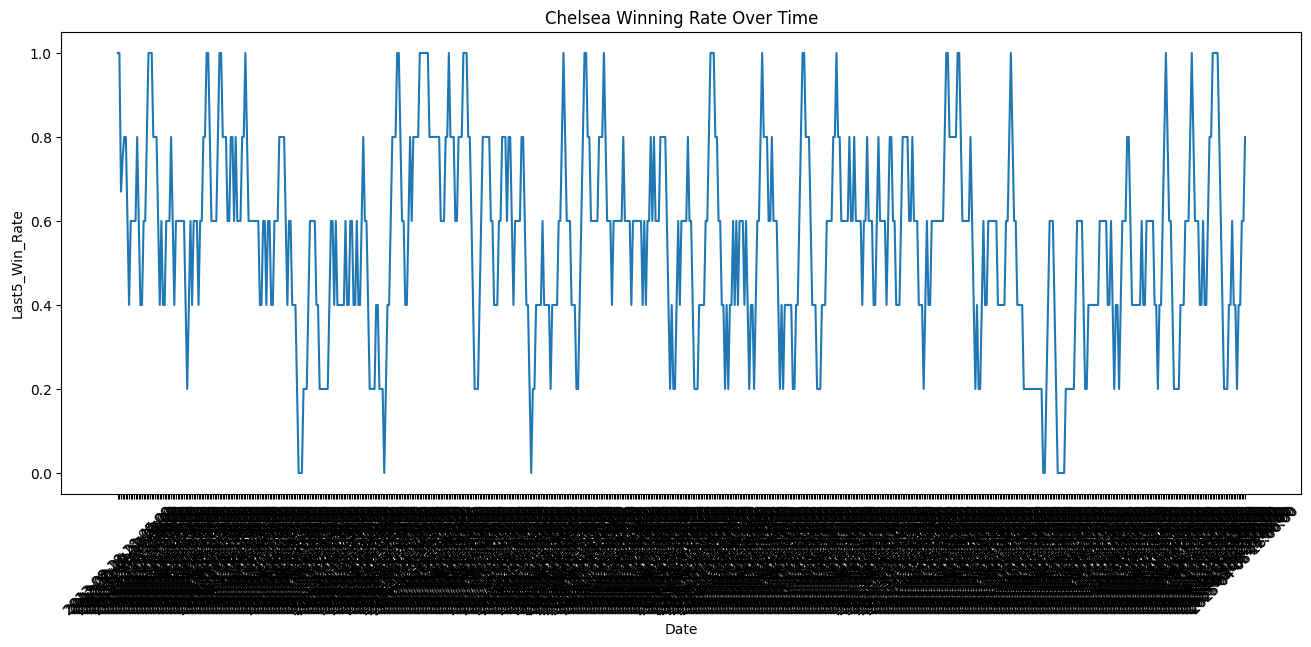

In [24]:
plt.figure(figsize=(16,6))
sns.lineplot(x='Date', y='Last5_Win_Rate', data=df1)
plt.title("Chelsea Winning Rate Over Time")
plt.xticks(rotation=45)
plt.show()

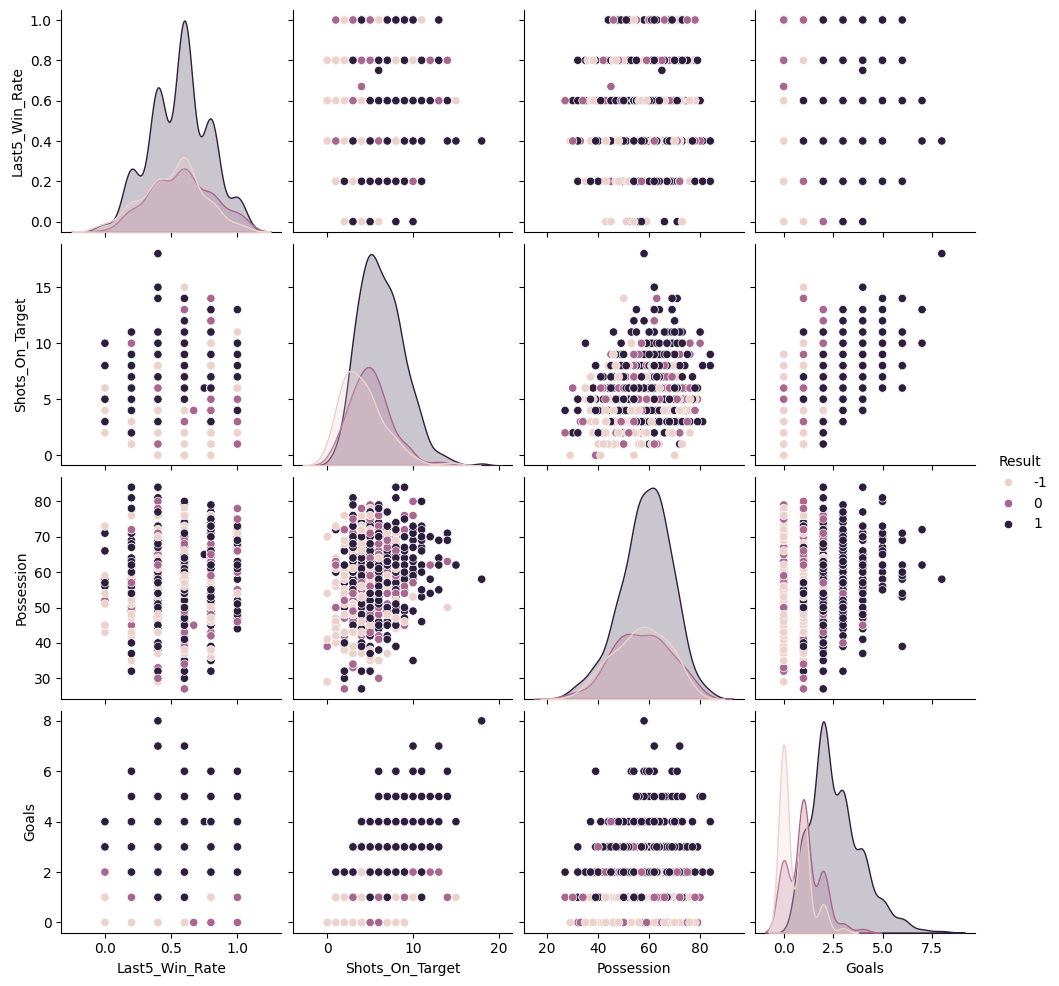

In [25]:
sns.pairplot(df1, vars=['Last5_Win_Rate','Shots_On_Target','Possession','Goals'], hue='Result')
plt.show()

In [44]:
X = df1.drop(['Last5_Win_Rate', 'Date', 'Result'], axis=1)
y = df1['Last5_Win_Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Possession', 'Shots_On_Target', 'Pass_Accuracy', 'Opponent_Possession', 'Opponent_Pass_Accuracy', 'Shot_Efficiency', 'Last5_Avg_Goals']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Opponent'])
    ],
    remainder='passthrough' # This ensures that other columns like 'Date', 'Is_Home', etc. are passed through
)

In [61]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [62]:
pipeline = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [63]:
R_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {R_squared}")
print(f"mean squared error: {mse}")
print(f"mean absolute error: {mae}")

R-squared: 0.17854159423896288
mean squared error: 0.041314039285714296
mean absolute error: 0.1566


##The R2 value explains a poor model, the model requires more modifications , increase the features etc.